<h1>Socrata API</h1>

<h3>For this project you will use requests package and the SODA API to access data through https://data.nashville.gov/. We'll start out with something familiar, the Top 500 Monthly Searches, then pull in different datasets further on. You will make different API requests for each individual question.</h3>

<h3>Each dataset has its own api endpoint. You can find the endpoint for a dataset by clicking on the API button in the top right of the dataset screen, then copying the API Endpoint. The default output is JSON, which you can leave unchanged:</h3>

<h3>Each API is different, so it is very important to read the documentation for each API to know how to use it properly. The documentation for the SODA API is here. It is HIGHLY RECOMMENDED that you read the documentation before making any requests, then do deeper dives into specific use cases when questions require. NOTE that the examples in the documentation don't use the requests package. You will need to look at the examples and figure out which things go in the url and which things go in the params.</h3>

In [40]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

<h3>1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?</h3>

In [25]:
response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=fire&year=2016')
fire_df = pd.read_json(response.text)
top_month_df = fire_df.max()
print(f'The top month: {top_month_df.month_name}')

The top month: September


<h3>2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?</h3>

In [22]:
response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100&$limit=100000')
century_query_mark_df = pd.read_json(response.text)
print(f'The number of times a query was run more than 100 times in a single month: {len(century_query_mark_df)}')

The number of times a query was run more than 100 times in a single month: 1262


<h3>3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?</h3>

In [28]:
response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=codes&$where=query_count>100&$limit=100000')
codes_query_df = pd.read_json(response.text)
print(f'The number of times a query containing the word "codes" was run more than 100 times in a single month: {len(codes_query_df)}')

The number of times a query containing the word "codes" was run more than 100 times in a single month: 56


<h3>4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.</h3>

     month_name  year  query_count query_text  month     month_year
2       January  2014         97.0       maps    NaN   January 2014
503    February  2014        140.0       maps    NaN  February 2014
1005      March  2014        144.0       maps    NaN     March 2014
1503      April  2014        152.0       maps    NaN     April 2014
2003        May  2014        119.0       maps    NaN       May 2014


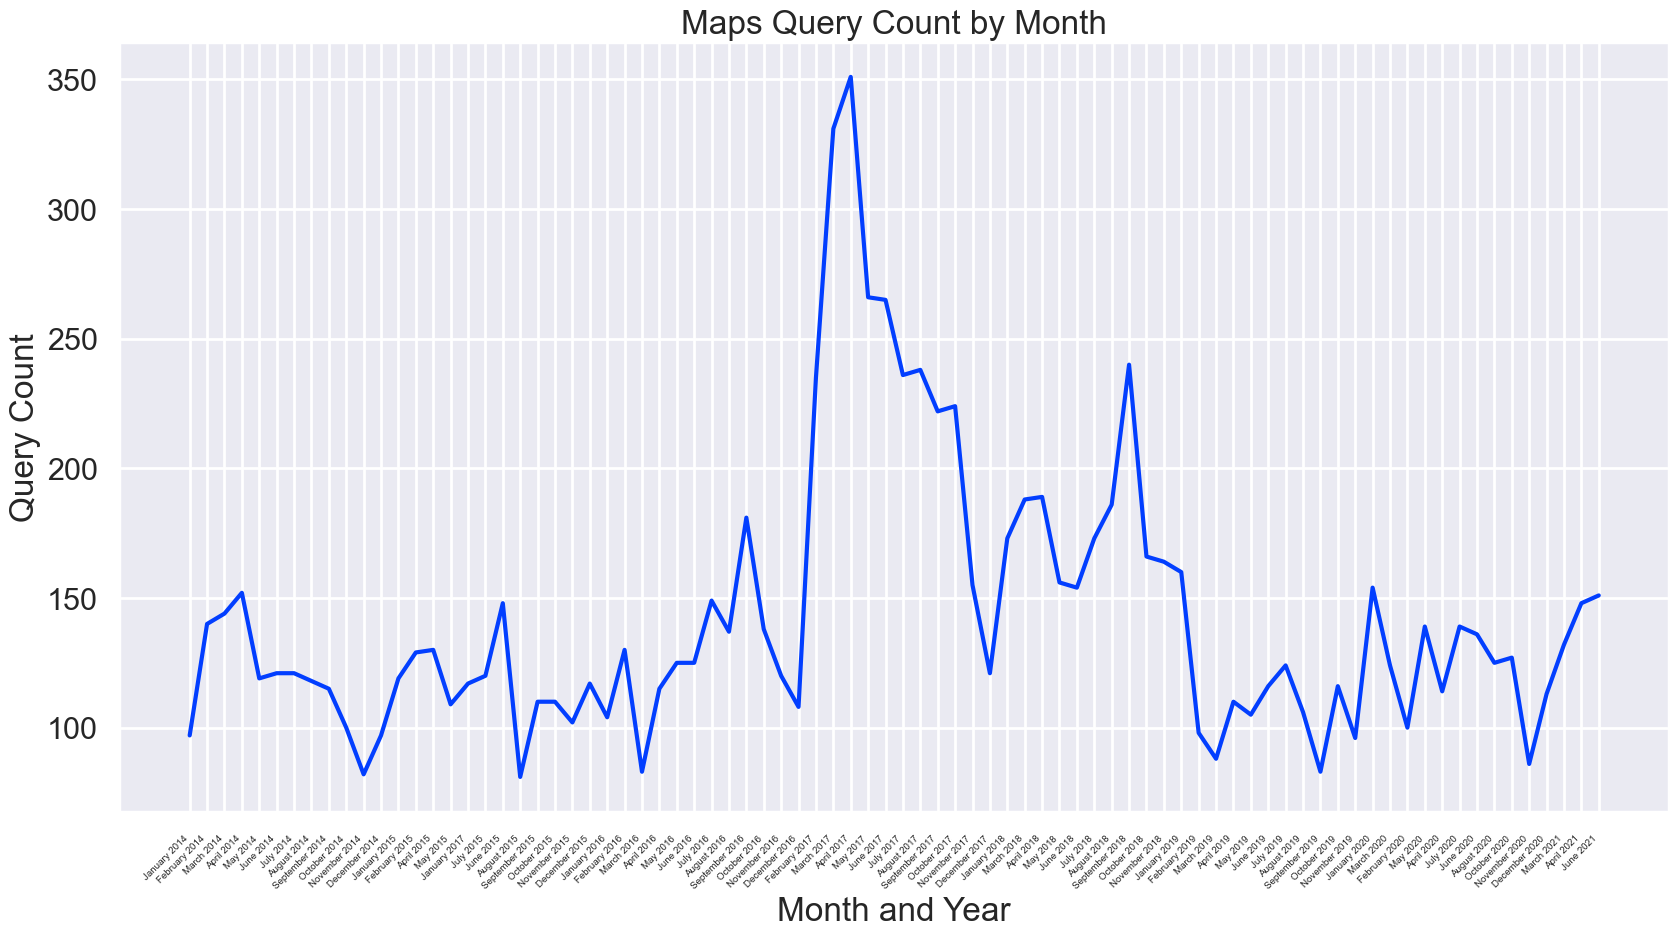

In [64]:
response = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=20000000')
entire_dataset_df = pd.read_json(response.text)
entire_dataset_df.loc[:, 'month_year'] = entire_dataset_df['month_name'] + ' ' + maps_query_df['year'].astype(str)
maps_query_df = entire_dataset_df[entire_dataset_df['query_text'] == 'maps']
print(maps_query_df.head())

# Using seaborn to plot the query count by month & years
sns.set_palette('bright')
plt.figure(figsize=(20, 10))
sns.lineplot(data=maps_query_df, x='month_year', y='query_count')
plt.title('Maps Query Count by Month')
plt.xlabel('Month and Year')
plt.ylabel('Query Count')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.show()